In [518]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as  pd
%run funciones.ipynb

In [519]:
df = pd.read_csv("dataset_mop.csv", encoding="ISO-8859-1")

In [520]:
%run renombrar_columnas.ipynb

# Limpiar valores

In [521]:
%run limpieza.ipynb


/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_57618/89360975.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


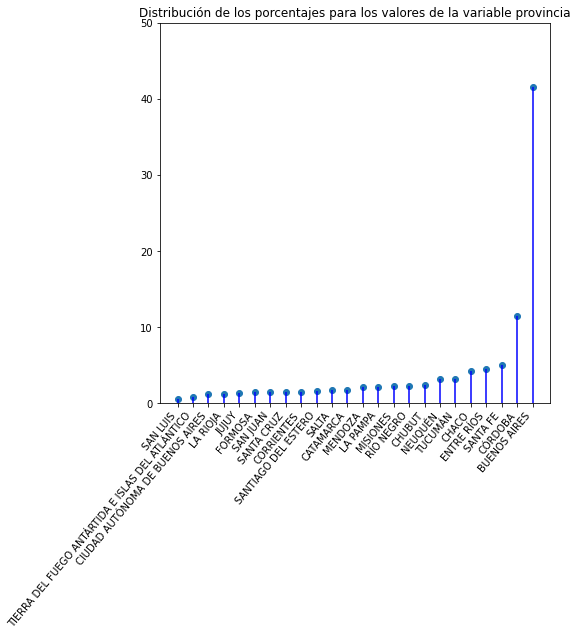

In [522]:
draw_distr(df, "provincia", maxy=50)

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_57618/89360975.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


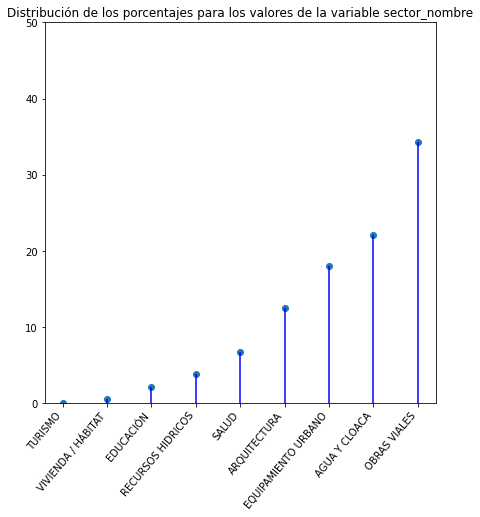

In [523]:
draw_distr(df, "sector_nombre", maxy=50)

# Ver descripcion / summary general del DF

In [524]:
_df = df[["numero_saf","codigo_bahra","plazo_dias","duracion_obra", "entidad_ejecutora_id"]].describe()
ladf = _df.style.set_properties(**{'text-align': 'left'})
ladf

,numero_saf,codigo_bahra,plazo_dias,duracion_obra,entidad_ejecutora_id
count,668.000000,2162.000000,2162.000000,2588.000000,2588.000000
mean,551.423653,272785969901631.812500,359.722479,1.041345,1167.039026
std,103.174334,285647493390956.812500,601.468028,1.770629,507.675455
min,364.000000,2007.000000,0.000000,-5.000000,1000.000000
25%,604.000000,63640364030004.000000,120.000000,0.000000,1033.000000
50%,604.000000,140910703650000.000000,180.000000,0.000000,1075.000000
75%,613.000000,500070007010004.000000,240.000000,1.000000,1079.000000
max,613.000000,940140014020000.000000,4932.000000,14.000000,3510.000000


In [525]:
_df = df[["proyecto_id", "numero_obra", "monto_total", "sector_id", "avance_financiero", "avance_fisico"]].describe()
ladf = _df.style.set_properties(**{'text-align': 'left'})
ladf

,proyecto_id,numero_obra,monto_total,sector_id,avance_financiero,avance_fisico
count,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000,2588.000000
mean,711316361.747682,88601.237635,310515865.815294,1006.568393,50.310587,48.112403
std,447174685.274923,59990.826244,1409304132.230583,6.531565,32.736939,40.923329
min,161476.000000,0.000000,0.000000,1001.000000,0.000000,0.000000
25%,16970107.500000,4524.500000,8715823.000000,1002.000000,30.000000,0.000000
50%,1003107919.500000,107920.500000,20783765.000000,1004.000000,40.000000,40.920000
75%,1003124949.250000,124950.500000,85932667.250000,1009.000000,86.432500,98.565000
max,1003500002.000000,500002.000000,33805989178.000000,1026.000000,100.000000,100.000000


# Distribucion de las duraciones de las obras en años

<AxesSubplot:title={'center':'Distribución de las duraciones de las obras (en años)'}, ylabel='Frequency'>

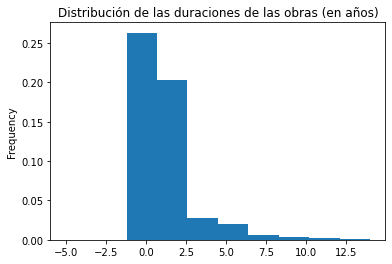

In [526]:
df["duracion_obra"].plot(kind="hist", density=True, title="Distribución de las duraciones de las obras (en años)")

# Analicemos los missing values

In [527]:
percent_missing = df.isnull().sum()  * 100 / len(df)
percent_missing

proyecto_id                  0.000000
numero_obra                  0.000000
codigo_bapin                 0.000000
fecha_inicio                 0.000000
fecha_fin                    0.000000
nombre_obra                  0.000000
descripcion_fisica           2.202473
monto_total                  0.000000
sector_id                    0.000000
sector_nombre                0.000000
avance_financiero            0.000000
avance_fisico                0.000000
entidad_ejecutora_id         0.000000
entidad_ejecutora_nombre     2.743431
duracion_obra                0.000000
plazo_dias                  16.460587
objetivo_general             2.202473
tipo_proyecto                0.000000
depto                        0.000000
provincia                    0.000000
codigo_bahra                16.460587
etapa_obra                   0.193199
numero_saf                  74.188563
moneda_id                    0.000000
dtype: float64

# Analicemos los valores que son 0 en plazo_dias

In [528]:
df[df == 0].count(axis=0)/len(df.index)

proyecto_id                 0.000000
numero_obra                 0.000773
codigo_bapin                0.000000
fecha_inicio                0.000000
fecha_fin                   0.000000
nombre_obra                 0.000000
descripcion_fisica          0.000000
monto_total                 0.000386
sector_id                   0.000000
sector_nombre               0.000000
avance_financiero           0.105873
avance_fisico               0.268934
entidad_ejecutora_id        0.000000
entidad_ejecutora_nombre    0.000000
duracion_obra               0.500000
plazo_dias                  0.001932
objetivo_general            0.000000
tipo_proyecto               0.000000
depto                       0.000000
provincia                   0.000000
codigo_bahra                0.000000
etapa_obra                  0.000000
numero_saf                  0.000000
moneda_id                   0.000000
dtype: float64

In [529]:
# Ejemplos de entidad_ejecutora_nombre null
df[df["entidad_ejecutora_nombre"].isnull()][["proyecto_id", "entidad_ejecutora_id", "entidad_ejecutora_nombre"]]

,proyecto_id,entidad_ejecutora_id,entidad_ejecutora_nombre
690,152003009,1000,NaN
691,152016012,1000,NaN
692,152024009,1000,NaN
693,152025004,1000,NaN
694,152025005,1000,NaN
...,...,...,...
756,155119007,1000,NaN
757,155122009,1000,NaN
758,155125005,1000,NaN
759,155128005,1000,NaN


# Buscamos sectores id que tengan diferentes nombres

In [530]:
values_for_pair(df, "sector_id", "sector_nombre")

,sector_id,sector_nombre,cantidad_valores
0,1001,"[AGUA Y CLOACA, OBRAS VIALES]",2
1,1002,[ARQUITECTURA],1
2,1003,[EDUCACIÓN],1
3,1004,[EQUIPAMIENTO URBANO],1
4,1009,[OBRAS VIALES],1
5,1012,[VIVIENDA / HÁBITAT],1
6,1016,[RECURSOS HIDRICOS],1
7,1019,[TURISMO],1
8,1026,[SALUD],1


# Buscamos entidades ejecutoras id que tengan diferentes nombres

In [531]:
values_for_pair(df, "entidad_ejecutora_id", "entidad_ejecutora_nombre")

,entidad_ejecutora_id,entidad_ejecutora_nombre,cantidad_valores
0,1000,[nan],1
1,1001,[AUTORIDAD DE LA CUENCA MATANZA RIACHUELO],1
2,1012,[DIRECCIÓN NACIONAL DE VIALIDAD],1
3,1013,[ENTE NACIONAL DE OBRAS HÍDRICAS DE SANEAMIENTO],1
4,1024,[ORGANISMO PROVINCIAL DE JUJUY],1
5,1033,[MINISTERIO DE OBRAS PÚBLICAS],1
6,1055,[SECRETARÍA DE INFRAESTRUCTURA Y POLÍTICA HÍDR...,1
7,1056,[SSDUV],1
8,1057,[SUBSECRETARÍA DE OBRAS HIDRÁULICAS],1
9,1058,[SUBSECRETARÍA DE EJECUCIÓN DE OBRAS PÚBLICAS],1


# Removemos los NaN value de plazo_dias para analizar su relación con duracion_obra

In [532]:
df.dropna(subset = ["plazo_dias"], inplace=True)

In [533]:
df["plazo_dias_normalizado"] = abs(df["duracion_obra"] * 220 - df["plazo_dias"])

In [534]:
df[["plazo_dias_normalizado", "duracion_obra", "plazo_dias"]].sort_values(by="plazo_dias_normalizado", ascending=False)

,plazo_dias_normalizado,duracion_obra,plazo_dias
480,2540.0,14,540.0
192,2072.0,13,4932.0
190,1882.0,12,4522.0
195,1870.0,11,4290.0
191,1763.0,11,4183.0
...,...,...,...
125,0.0,0,0.0
102,0.0,0,0.0
110,0.0,0,0.0
130,0.0,0,0.0


<AxesSubplot:title={'center':'Comparación entre años y días de duración'}>

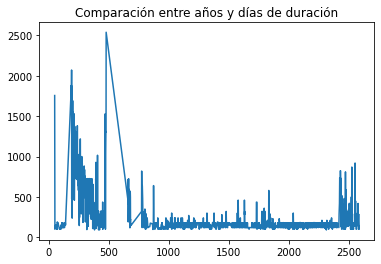

In [535]:
df[df["plazo_dias_normalizado"] > 90]["plazo_dias_normalizado"].plot(title="Comparación entre años y días de duración")

# Diferencia entre plazo_dias y los dias convertidos desde duracion_obra

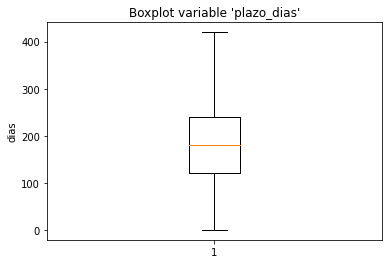

In [536]:
draw_boxplot(df, "plazo_dias", "dias")

/var/folders/xn/7r_77mhs5q57f148g277d6sspmz18w/T/ipykernel_57618/89360975.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(proy[var].str.upper(), fontdict={'horizontalalignment': 'right', 'size':10}, rotation=50)


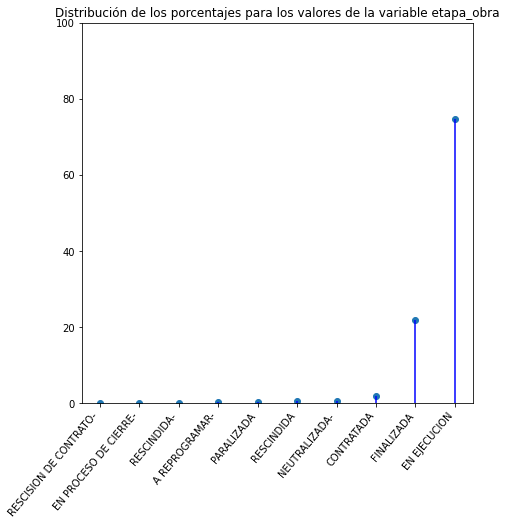

In [537]:

draw_distr(df, "etapa_obra", maxy=100)

# Distribución gastos entre las provincias

In [538]:
# Necesitamos cuánto se Sanciónó para cada provincia
df_biv1 = df[["monto_total", "provincia"]]
df_biv1 = df_biv1.groupby(['provincia'], as_index=False).sum()
df_biv1["monto_total"] = df_biv1["monto_total"] / 1000000

Text(0, 0.5, 'Gasto')

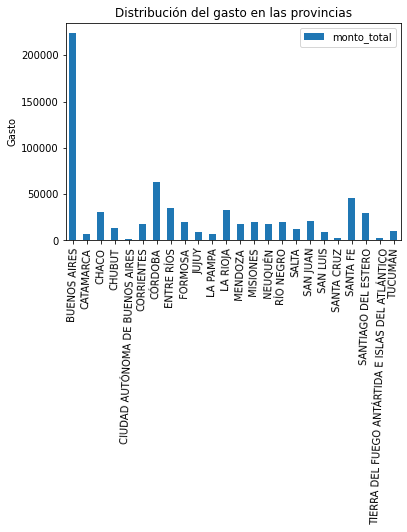

In [539]:
df_biv1.plot(kind='bar',x='provincia',y='monto_total', rot=88)
plt.title("Distribución del gasto en las provincias")
plt.xlabel("")
plt.ylabel("Gasto")